In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

### Task: 1- Load data 

In [6]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Task: 2-  Check data quality.

In [47]:
data.info()

<class 'pandas.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    int64  
 3   age       712 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  889 non-null    int64  
 8   alone     889 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 63.4 KB


In [33]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### Task: 3-

#### a. Delete the deck column because most of the data is missing and cann't be predict.

In [33]:
data = data.drop(columns='deck')

In [34]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,0,22.0,1,0,7.2500,S,False
1,1,1,1,38.0,1,0,71.2833,C,False
2,1,3,1,26.0,0,0,7.9250,S,True
3,1,1,1,35.0,1,0,53.1000,S,False
4,0,3,0,35.0,0,0,8.0500,S,True


#### b. Fill mean in the null in age column.

In [62]:
data['age'] = data['age'].fillna(data['age'].mean())

In [63]:
data['age'].mean()

np.float64(29.642092696629216)

#### c. remove the rows in which there are null values in embark town.

In [31]:
data = data.dropna(subset=['embark_town'])

#### d. replace sex with 0 & 1.

In [28]:
data['sex'] = data['sex'].map({'male':0, 'female': 1})

In [49]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,0,22.0,1,0,7.2500,0,False
1,1,1,1,38.0,1,0,71.2833,1,False
2,1,3,1,26.0,0,0,7.9250,0,True
3,1,1,1,35.0,1,0,53.1000,0,False
4,0,3,0,35.0,0,0,8.0500,0,True


### Task:4-

In [64]:
data['age'].isna().sum()

np.int64(0)

#### a. delete the duplicate column.

In [30]:
data = data.drop(columns=['embark_town','class','who','adult_male','alive'])

#### b. replace the values with 0,1 & 2

In [ ]:
data['embarked'] = data['embarked'].map({'S':0,'C':1,'Q':2})

In [43]:
data = data.dropna(subset=['embarked'])

#### change the float to int after removing 2 nan values row.

In [ ]:
data['embarked'] = data['embarked'].astype(int)

### Task: 5-

#### a. import library important for ML

In [ ]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 1.2 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.0 MB 907.1 kB/s eta 0:00:08
   ----- ---------------------------------- 1.0/8.0 MB 1.1 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.0 MB 1.0 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.0 MB 1.0 MB/s eta 0:00:07
   --------- ------------------------------ 1.8/8.0 MB 1.1 MB/s eta 0:00:06
   ---------- ----------------------------- 2.1/8.0 MB 1.1 MB/s eta 0:00:06
   ----------- ---------------------------- 2.4/8.0 MB 1.1 MB/s eta 0:00:06
   ------------- -------------------------- 2.6/8.0 MB 1.1 MB/s eta 0:00:05
   ------------- -------------------------- 2.6/8.0 MB 1.1 MB/s eta 0:00:05
   -------------- ------------------------- 2.9/8.0 MB 1.0 MB/s eta 0:00:06
   --------------- -----


[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### b. Teach the model for result prediction.

In [80]:
X = data.drop(columns='survived')
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X,y)
model = LogisticRegression(max_iter = 1000)

model.fit(X_train, y_train)

predict = model.predict(X_test)
predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1])

#### c. Find the accuracy by the machine prediction.

In [81]:
score = accuracy_score(y_test, predict)
score

0.8251121076233184

#### d. Match where machine fails to predict result.

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
confuse = confusion_matrix(y_test,predict)
confuse

array([[123,  19],
       [ 20,  61]])

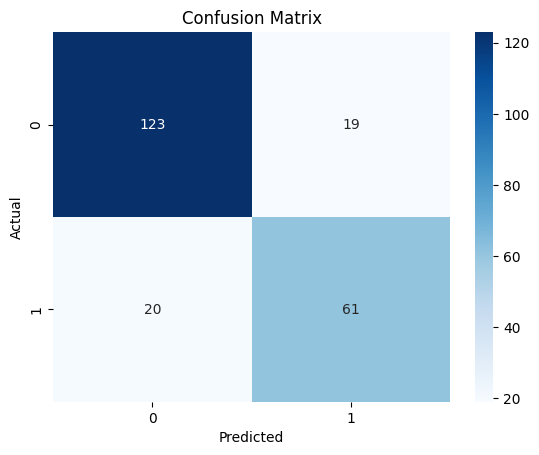

In [84]:
sns.heatmap(confuse, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [87]:
testdata = pd.DataFrame({
    'pclass': [3,1],
    'sex': [0,1],
    'age': [22,38],
    'sibsp': [0,0],
    'parch': [0,1],
    'fare': [7.25,100],
    'embarked': [0,0],
    'alone': [True, False]
})

test_predict = model.predict(testdata)
test_predict

array([0, 1])